# Desafio Watershed
Primero, se cargan librerías que se usarán en la resolución del desafío. También se setea una semilla para que el resultado sea reproducible

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from dateutil.relativedelta import relativedelta
import xgboost as xgb
import scikitplot as skplt
np.random.seed(123)

## Cargamos la data

In [2]:
df = pd.read_csv("flux.csv")  

## Realizamos un análisis exploratorio de variables 
Pondremos especial atención a cualquier valor faltante, formato incorrecto, o outliers/anomalías en la data



In [3]:
df.head() # Nos permite ver a priori los datos que tenemos

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


In [4]:
df.describe() #Vemos las estadisticas de cada variable: podemos ver si hay outliers o valores extraños

,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2
count,4.180480e+06,4.180480e+06,4.175037e+06,4.175037e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06
mean,7.179757e+06,5.253340e+01,2.947445e+00,1.365728e+01,-3.569572e+01,-7.129595e+01,1.760129e+03,2.404876e+03
std,3.180965e+06,1.676027e+02,8.766749e+00,6.615037e+00,8.047659e+00,1.254339e+00,1.382121e+03,4.322051e+03
min,1.001001e+06,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01
25%,4.558001e+06,8.680000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02
50%,7.350003e+06,5.171000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02
75%,9.416001e+06,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03
max,1.293000e+07,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04


Podemos notar que a priori tanto para la variable 'flux', como para 'precip' existen valores mucho más altos del comun de la muestra. Esto no es de preocuparse en nuestro caso ya que para ambas variables es posible llegar a tales valores en días específicos (tormentas o diluvios) por lo que no parecieran ser valores erroneos sino que más bien outliers. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   basin_id    int64  
 2   flux        float64
 3   precip      float64
 4   temp_max    float64
 5   gauge_name  object 
 6   lat         float64
 7   lon         float64
 8   mean_elev   float64
 9   area_km2    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 318.9+ MB


De aqui vemos que tenemos un poco más de 4 millones de observaciones y 10 columnas para trabajar

In [6]:
df.dtypes
df["date"]=pd.to_datetime(df["date"]) #transformamos variable a fecha para que sea más facil de manejar
df.dtypes

date          datetime64[ns]
basin_id               int64
flux                 float64
precip               float64
temp_max             float64
gauge_name            object
lat                  float64
lon                  float64
mean_elev            float64
area_km2             float64
dtype: object

In [7]:
df.isnull().sum() #Vemos cuantos NA se tienen en cada columna

date             0
basin_id         0
flux             0
precip        5443
temp_max      5443
gauge_name       0
lat              0
lon              0
mean_elev        0
area_km2         0
dtype: int64

Notamos que tanto para la variable precip como temp_max si existen observaciones que contienen missing (5.443 obs).Veremos si estos datos son aleatorios o corresponden a un caso en particular.

In [8]:
df["year"]=df["date"].dt.year
df.groupby('year').agg({'precip': lambda x: x.isnull().sum()})

,precip
year,
1980,0
1981,0
1982,0
1983,0
1984,0
1985,0
1986,0
1987,0
1988,0


Notamos que las observaciones faltantes corresponden a valores unicamente del año 2020, luego podría deberse a un error de medición en este periodo para alguna estación específica. Dado que estas corresponden a solo un 0,1% de las observaciones totales que tenemos y, además, poseemos harta información, se procede a eliminarlo de la base. En caso de que hubieran sido varias observaciones que estuvieran en missing o sospecharamos de una posible relación entre missings y observaciones (que podría llevarnos a un sesgo y por ende a conclusiones incorrectas) podriamos considerar otro método de imputación. 

In [9]:
df = df.dropna() #Eliminamos los NA si son pocos

In [10]:
df.isnull().sum() #Revisamos que efectivamente no existan NAs en las columnas

date          0
basin_id      0
flux          0
precip        0
temp_max      0
gauge_name    0
lat           0
lon           0
mean_elev     0
area_km2      0
year          0
dtype: int64

In [11]:
df.gauge_name.value_counts(normalize=True) #Vemos cuantos datos tenemos de cada estacion en términos porcentuales

Rio Aconcagua En Chacabuquito                   0.003506
Rio Cruces En Rucaco                            0.003501
Rio Choapa En Cuncumen                          0.003499
Rio Elqui En Algarrobal                         0.003497
Rio Cautin En Cajon                             0.003490
                                                  ...   
Estero Chimbarongo En Santa Cruz                0.000079
Rio Chillan En Longitudinal                     0.000072
Rio Pama Entrada Embalse Cogoti                 0.000047
Estero Las Vegas Aguas Abajo Canal Las Vegas    0.000047
Rio Blanco En Chaiten                           0.000042
Name: gauge_name, Length: 503, dtype: float64

Vemos que se tienen 503 estaciones y las observaciones son similares en porcentaje en cada estación.

In [12]:
df.corr() #vemos los valores que están muy correlacionados

,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2,year
basin_id,1.000000,0.218240,0.154384,0.024728,-0.972365,-0.715169,-0.839035,-0.081630,0.113157
flux,0.218240,1.000000,0.157168,-0.065097,-0.180506,-0.258978,-0.172210,0.422901,0.048147
precip,0.154384,0.157168,1.000000,-0.167713,-0.114745,-0.174026,-0.153925,-0.030863,0.000823
temp_max,0.024728,-0.065097,-0.167713,1.000000,0.028275,-0.276995,-0.339706,0.049079,-0.004721
lat,-0.972365,-0.180506,-0.114745,0.028275,1.000000,0.621655,0.785573,0.081472,-0.105797
lon,-0.715169,-0.258978,-0.174026,-0.276995,0.621655,1.000000,0.818343,-0.021812,-0.059109
mean_elev,-0.839035,-0.172210,-0.153925,-0.339706,0.785573,0.818343,1.000000,0.049045,-0.065229
area_km2,-0.081630,0.422901,-0.030863,0.049079,0.081472,-0.021812,0.049045,1.000000,0.042329
year,0.113157,0.048147,0.000823,-0.004721,-0.105797,-0.059109,-0.065229,0.042329,1.000000


Se puede ver que la variable que más correlaciona con 'flux' es el area, pero es importante aclarar que esta correlación positiva no implica causalidad, es decir, aquellas observaciones que se miden en areas más grandes tienen mayor flujo en promedio. Luego, no podemos decir que debido a que son areas más grandes existen mayores flujos como consecuencia.
Podemos ver tambien que el flujo se correlaciona levemente y de forma positiva con las precipitaciones, es decir, en zonas de mayor precipitación ocurren mayor cantidad de flujos en promedio. La correlación es opuesta al observar la temperatura máxima: en lugares de menor temperatura ocurren más flujos.

## Graficamos los flujos, las temperaturas y las precipitaciones
Creamos una función que nos permita gráficar la evolución en un cierto periodo de una variable específica en una estación específica


In [13]:
def plot_one_timeserie(cod_station, variable, min_date, max_date):
		df2 = df[(df["basin_id"]==cod_station) & (df["date"]>=min_date) & (df["date"]<=max_date)] #filtramos por estacion y periodo
		plt.plot(df2['date'],df2[variable]) #graficamos la variable respecto a la fecha
		plt.xlabel("Fecha") # Escribimos la etiqueta del eje x
		plt.ylabel(variable) # Escribimos la etiqueta del eje y
		plt.xticks(rotation=30, ha='right') # Ajuste de diseño
		plt.title("Serie de tiempo para "+ str(variable)+ " en estación "+ str(cod_station)+"\nPeriodos entre "+ str(min_date) + " y " + str(max_date), fontsize=16) #titulo
		plt.show() #mostrar gráfico

Probamos la correcta ejecución de la función

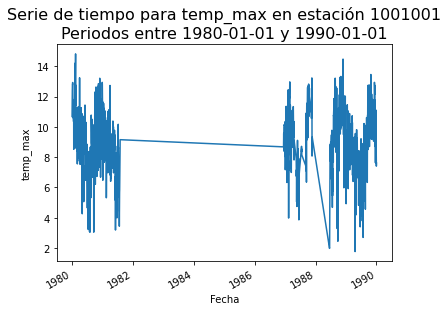

In [14]:
plot_one_timeserie(1001001, 'temp_max', '1980-01-01', '1990-01-01')

Vemos que para esa estación específica no tenemos datos entre los años 1980 y 1987, lo cual debemos tener en cuenta al considerar posibles implicaciones que afecten nuesro modelado al intentar hacer lags.

Ahora creamos una función que grafica una serie de tiempo para un periodo específico, mostrando la evolución en el tiempo de las 3 variables. 
Iniciaremos normalizando las 3 variables de interes para que queden bajo la misma escala y sean comparables de forma más sencilla en el gráfico


In [15]:
def plot_three_timeseries(cod_station, min_date, max_date):
  df2 = df[(df["basin_id"]==cod_station) & (df['date']>=min_date) & (df['date']<=max_date)] #Filtramos la base
  df3 = df2[["flux","precip","temp_max"]] #Seleccionamos las variables que queremos normalizar  
  df2 = df2.drop(["flux","precip","temp_max"], axis=1) #Eliminamos estas mismas variables de la base original 
  df3 = (df3 - df3.min()) / (df3.max() - df3.min()) #Normalizamos las variables en base al minimo y máximo  
  df2= pd.concat([df2, df3], axis=1) #Volvemos a unir ambas bases 
  plt.plot(df2['date'],df2['flux'], color='red', label='Flujo', linewidth=3) #Gráficamos flux en función del tiempo
  plt.plot(df2['date'],df2['precip'], color='blue', label='Precipitación', linewidth=3) #Gráficamos precip en funcion del tiempo
  plt.plot(df2['date'],df2['temp_max'], color='green', label='Temperatura', linewidth=3) #Graficamos temp_max en función del tiempo
  plt.xlabel("Fecha") #Escribimos el nombre del eje x
  plt.ylabel("Variables normalizadas") #Escribimos el nombre del eje y
  plt.xticks(rotation=30, ha='right') #Ajustes de diseño
  plt.legend(bbox_to_anchor=(1.05, 1)) #Ajustes de diseño
  plt.title("Series de tiempo en estación "+ str(cod_station)+"\nPeriodos entre "+ str(min_date) + " y " + str(max_date), y=1.05, fontsize=18) #Titulo del gráfico
  plt.show() #Mostrar gráfico

Probamos la función para comprobar su correcta ejecucion

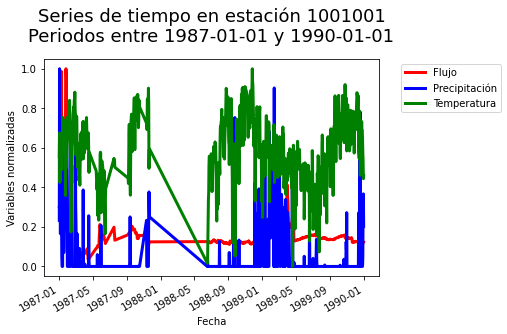

In [16]:
plot_three_timeseries(1001001, '1987-01-01', '1990-01-01')

Podemos notar que, al menos en el periodo de tiempo seleccionado se observa que las variables no tienen igual tendencia en el tiempo. Por ejemplo, los peaks de las variables no ocurren en la misma época (probablemente se muevan en mayor medida con las estaciones del año). 

## Creamos nuevas variables
Para crear las variables solicitadas, comenzaremos realizando una marca de la estación del año en que fue tomada la observación. Es importante considerar que para este ejercicio se aproximó la estación en base al mes del año buscando simplicidad, pero la fecha podría no ser exactamente esa estación.


In [17]:
df["month"] = df["date"].dt.month #Creamos variable que indique el mes del año (valor entre 1 y 12)
df.loc[((df["month"]==1) | (df["month"]==2) | (df["month"]==3) ,"estacion")]="verano" #ene,feb y mar se dejan como verano
df.loc[((df["month"]==4) | (df["month"]==5) | (df["month"]==6) ,"estacion")]="otono" #abr, may, jun se dejan como otoño
df.loc[((df["month"]==7) | (df["month"]==8) | (df["month"]==9) ,"estacion")]="invierno" #jul, ago, sep se dejan como invierno
df.loc[((df["month"]==10) | (df["month"]==11) | (df["month"]==12) ,"estacion")]="primavera" #oct, nov, dic se dejan como primavera
df.groupby('estacion').count() #chequeamos que el resultado es correcto

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,year,month
estacion,,,,,,,,,,,,
invierno,1039808,1039808,1039808,1039808,1039808,1039808,1039808,1039808,1039808,1039808,1039808,1039808
otono,1038166,1038166,1038166,1038166,1038166,1038166,1038166,1038166,1038166,1038166,1038166,1038166
primavera,1050439,1050439,1050439,1050439,1050439,1050439,1050439,1050439,1050439,1050439,1050439,1050439
verano,1046624,1046624,1046624,1046624,1046624,1046624,1046624,1046624,1046624,1046624,1046624,1046624


En base a la variable creada anteriormente, se procede a crear la variable 'flux_extreme', la cual tendrá el valor 1 si el flujo de aquel día está sobre el percentil 95 para esa estación del año y 0 en caso contrario.

In [18]:
df.loc[(df["estacion"]=="verano") & (df["flux"]>=np.percentile(df[df["estacion"]=="verano"]["flux"], 95)), "flux_extreme"] =1 #verano que sea flux_extreme
df.loc[(df["estacion"]=="verano") & (df["flux"]<np.percentile(df[df["estacion"]=="verano"]["flux"], 95)), "flux_extreme"] =0 #verano que no sea flux_extreme
df.loc[(df["estacion"]=="otono") & (df["flux"]>=np.percentile(df[df["estacion"]=="otono"]["flux"], 95)), "flux_extreme"] =1 #otoño que sea flux_extreme
df.loc[(df["estacion"]=="otono") & (df["flux"]<np.percentile(df[df["estacion"]=="otono"]["flux"], 95)), "flux_extreme"] =0 #otoño que no sea flux_extreme
df.loc[(df["estacion"]=="invierno") & (df["flux"]>=np.percentile(df[df["estacion"]=="invierno"]["flux"], 95)), "flux_extreme"] =1 #invierno que sea flux_extreme
df.loc[(df["estacion"]=="invierno") & (df["flux"]<np.percentile(df[df["estacion"]=="invierno"]["flux"], 95)), "flux_extreme"] =0 #invierno que no sea flux_extreme
df.loc[(df["estacion"]=="primavera") & (df["flux"]>=np.percentile(df[df["estacion"]=="primavera"]["flux"], 95)), "flux_extreme"] =1 #primavera que sea flux_extreme
df.loc[(df["estacion"]=="primavera") & (df["flux"]<np.percentile(df[df["estacion"]=="primavera"]["flux"], 95)), "flux_extreme"] =0 #primavera que no sea flux_extreme

df["flux_extreme"].describe() 
df.groupby('estacion')['flux_extreme'].value_counts(normalize=True) # chequeamos que la variable se creó correctamente

estacion   flux_extreme
invierno   0.0             0.949999
           1.0             0.050001
otono      0.0             0.949973
           1.0             0.050027
primavera  0.0             0.949999
           1.0             0.050001
verano     0.0             0.949850
           1.0             0.050150
Name: flux_extreme, dtype: float64

Ahora se procede a crear la variable 'temp_extreme', la cual tendrá el valor 1 si la temp de aquel día está sobre el percentil 95 para esa estación del año y 0 en caso contrario.

In [19]:
df.loc[(df["estacion"]=="verano") & (df["temp_max"]>=np.percentile(df[df["estacion"]=="verano"]["temp_max"], 95)), "temp_extreme"] =1 #verano que sea temp_extreme
df.loc[(df["estacion"]=="verano") & (df["temp_max"]<np.percentile(df[df["estacion"]=="verano"]["temp_max"], 95)), "temp_extreme"] =0 #verano que no sea temp_extreme
df.loc[(df["estacion"]=="otono") & (df["temp_max"]>=np.percentile(df[df["estacion"]=="otono"]["temp_max"], 95)), "temp_extreme"] =1 #otoño que sea temp_extreme
df.loc[(df["estacion"]=="otono") & (df["temp_max"]<np.percentile(df[df["estacion"]=="otono"]["temp_max"], 95)), "temp_extreme"] =0 #otoño que no sea temp_extreme
df.loc[(df["estacion"]=="invierno") & (df["temp_max"]>=np.percentile(df[df["estacion"]=="invierno"]["temp_max"], 95)), "temp_extreme"] =1 #invierno que sea temp_extreme
df.loc[(df["estacion"]=="invierno") & (df["temp_max"]<np.percentile(df[df["estacion"]=="invierno"]["temp_max"], 95)), "temp_extreme"] =0 #invierno que no sea temp_extreme
df.loc[(df["estacion"]=="primavera") & (df["temp_max"]>=np.percentile(df[df["estacion"]=="primavera"]["temp_max"], 95)), "temp_extreme"] =1 #primavera que sea temp_extreme
df.loc[(df["estacion"]=="primavera") & (df["temp_max"]<np.percentile(df[df["estacion"]=="primavera"]["temp_max"], 95)), "temp_extreme"] =0 #primavera que no sea temp_extreme

df["temp_extreme"].describe() 
df.groupby('estacion')['temp_extreme'].value_counts(normalize=True) # chequeamos que la variable se creó correctamente

estacion   temp_extreme
invierno   0.0             0.949999
           1.0             0.050001
otono      0.0             0.949999
           1.0             0.050001
primavera  0.0             0.950000
           1.0             0.050000
verano     0.0             0.949999
           1.0             0.050001
Name: temp_extreme, dtype: float64

Ahora se procede a crear la variable 'precip_extreme', la cual tendrá el valor 1 si la temp de aquel día está sobre el percentil 95 para esa estación del año y 0 en caso contrario.

In [20]:
df.loc[(df["estacion"]=="verano") & (df["precip"]>=np.percentile(df[df["estacion"]=="verano"]["precip"], 95)), "precip_extreme"] =1 #verano que sea precip_extreme
df.loc[(df["estacion"]=="verano") & (df["precip"]<np.percentile(df[df["estacion"]=="verano"]["precip"], 95)), "precip_extreme"] =0 #verano que no sea precip_extreme
df.loc[(df["estacion"]=="otono") & (df["precip"]>=np.percentile(df[df["estacion"]=="otono"]["precip"], 95)), "precip_extreme"] =1 #otoño que sea precip_extreme
df.loc[(df["estacion"]=="otono") & (df["precip"]<np.percentile(df[df["estacion"]=="otono"]["precip"], 95)), "precip_extreme"] =0 #otoño que no sea precip_extreme
df.loc[(df["estacion"]=="invierno") & (df["precip"]>=np.percentile(df[df["estacion"]=="invierno"]["precip"], 95)), "precip_extreme"] =1 #invierno que sea precip_extreme
df.loc[(df["estacion"]=="invierno") & (df["precip"]<np.percentile(df[df["estacion"]=="invierno"]["precip"], 95)), "precip_extreme"] =0 #invierno que no sea precip_extreme
df.loc[(df["estacion"]=="primavera") & (df["precip"]>=np.percentile(df[df["estacion"]=="primavera"]["precip"], 95)), "precip_extreme"] =1 #primavera que sea precip_extreme
df.loc[(df["estacion"]=="primavera") & (df["precip"]<np.percentile(df[df["estacion"]=="primavera"]["precip"], 95)), "precip_extreme"] =0 #primavera que no sea precip_extreme

df["precip_extreme"].describe() 
df.groupby('estacion')['precip_extreme'].value_counts(normalize=True) # chequeamos que la variable se creó correctamente

estacion   precip_extreme
invierno   0.0               0.949999
           1.0               0.050001
otono      0.0               0.949999
           1.0               0.050001
primavera  0.0               0.950000
           1.0               0.050000
verano     0.0               0.949999
           1.0               0.050001
Name: precip_extreme, dtype: float64

Esta podría ser una buena forma de capturar eventos extremos si estuvieramos en un periodo específico del tiempo. Por ejemplo: un periodo de dos años. Pero dado que aqui estamos trabajando con un periodo de casi 40 años no tiene mucho sentido ver cuando ocurren las mayores temperatura en cada estación porque debido al cambio climático las temperaturas hace 40 años definitivamente no eran tan altas o bajas como los son ahora, por ende, esta metodología puede llevar a un sesgo donde los eventos extremos se condencen unicamente en los meses más actuales y a priori antiguamente no ocurrían eventos extremos, lo cual sabemos es falso. 
Otro enfoque desde el que podriamos afrontar este problema sería analizar los eventos clima extremos (5% superior) pero en cada año o en un periodo de cada 3 años por ejemplo, donde los eventos meteorológivos no cambien de sobremanera entre el año más antiguo y el mas nuevo, evitando así que los eventos extremos parezcan ocurrir unicamente en los últimos años.

## Graficamos la variable flux_extreme
En base a la variable que creamos más arriba, graficaremos su cambio en el tiempo, donde diferenciaremos por estación de medición para ver si el comportamiento varía entre estas


In [21]:
df.groupby(["date","gauge_name"])["flux_extreme"].sum() # Chequeamos de forma rápida la data

date        gauge_name                             
1980-01-01  Estero Alhue En Quilamuta                  0.0
            Estero Camisas En Desembocadura            0.0
            Estero Cardo Verde En Lo Ubaldo            0.0
            Estero Catemu Antes Junta Rio Aconcagua    0.0
            Estero Chanco Camino Curacautin            0.0
                                                      ... 
2020-04-29  Rio Tres Brazos Antes Bt. Sendos           0.0
            Rio Turbio En Varillar                     0.0
            Rio Uble En San Fabian N 2                 0.0
            Rio Volcan En Queltehues                   0.0
2020-04-30  Rio Biobio En Desembocadura                1.0
Name: flux_extreme, Length: 4175037, dtype: float64

In [22]:
df["gauge_name"].value_counts() # vemos cuantos datos tenemos en cada estación

Rio Aconcagua En Chacabuquito                   14638
Rio Cruces En Rucaco                            14617
Rio Choapa En Cuncumen                          14607
Rio Elqui En Algarrobal                         14602
Rio Cautin En Cajon                             14571
                                                ...  
Estero Chimbarongo En Santa Cruz                  328
Rio Chillan En Longitudinal                       302
Rio Pama Entrada Embalse Cogoti                   195
Estero Las Vegas Aguas Abajo Canal Las Vegas      195
Rio Blanco En Chaiten                             175
Name: gauge_name, Length: 503, dtype: int64

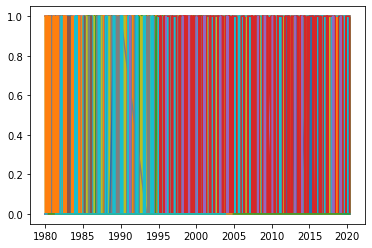

In [23]:
for i in range(0,len(df['gauge_name'].unique())): # graficamos cómo varía 'flux_extreme' por día en cada estación
  df2 = df[df['gauge_name']==(df['gauge_name'].unique()[i])] #filtramos por estación i
  plt.plot(df2['date'] , df2['flux_extreme']) #graficamos la variable

plt.show() # mostramos el resultado

Claramente este gráfico no nos fue de mucha ayuda ya que son demasiadas fechas y estaciones por medir. Reduciremos entonces la dimensionalidad del evento a graficar. Nuestro enfoque será graficar la suma de eventos 'flux_extreme' en cada estación por año y ver cómo varía este.

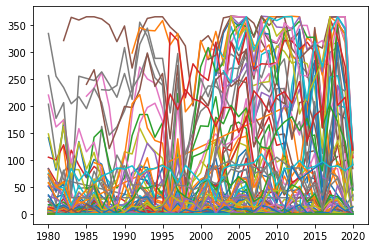

In [24]:
df['year'] = df['date'].dt.year #creamos variable que indique el año de cada observación

for i in range(0,len(df['gauge_name'].unique())): #iteramos en todas las estaciones
  df2 = df[df['gauge_name']==(df['gauge_name'].unique()[i])] #filtramos por estación i
  df2 = df2.groupby(['year'], as_index=False)['flux_extreme'].sum() #calculamos la suma de eventos extremos para cada año
  df2.columns=['year','sum_extreme'] # seleccionamos los nuevos nombres de las columnas que utilizaremos
  plt.plot(df2['year'] , df2['sum_extreme']) # Gráficamos la cantidad de eventos extremos en función del año para la estación i

plt.show() #mostramos el gráfico

Pese a que el gráfico no es lo más amigable posible, de todas maneras se puede observar que entre distintas estaciones los comportamientos varían. Esta variación se observa de dos formas distintas:
1) Algunas estaciones presentan hasta 300 veces más eventos extremos que en otras.
2) Las tendencias de eventos extremos son distintas: en algunos casos cada vez se han presentado más eventos extremos, mientras que en otros se ha mantenido o incluso ha bajado la cantidad.

Por último graficaremos la cantidad de eventos extremos flux a nivel global y veremos que estos tienen una tendencia a subir en cantidad respecto a años anteriores (exceptuando el año 2020 donde ya sabemos que eliminamos datos por lo que se esperan menor cantidad de datos en total). Esta tendencia al alza podría deberse a que se tienen más mediciones actualmente, luego vale la pena analizarlo desde una mirada porcentual

No handles with labels found to put in legend.


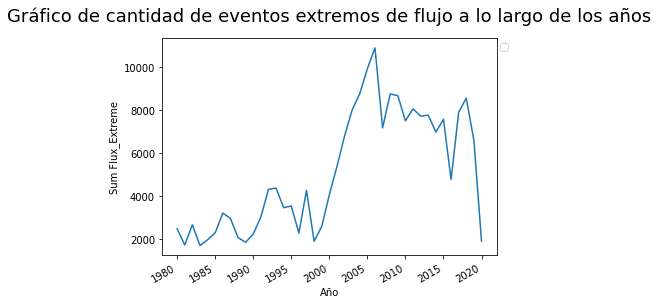

In [25]:
df['year'] = df['date'].dt.year #Creamos variable de año
df2 = df.groupby(['year'], as_index=False)['flux_extreme'].sum() #Suma de eventos extremos por año
df2.columns=['year','sum_extreme'] #renombramos columnas
plt.plot(df2['year'],df2['sum_extreme']) #graficamos
plt.xlabel("Año") #Escribimos el nombre del eje x
plt.ylabel("Sum Flux_Extreme") #Escribimos el nombre del eje y
plt.xticks(rotation=30, ha='right') #Ajustes de diseño
plt.legend(bbox_to_anchor=(1.05, 1)) #Ajustes de diseño
plt.title("Gráfico de cantidad de eventos extremos de flujo a lo largo de los años", y=1.05, fontsize=18) #Titulo del gráfico
plt.show()

## Graficamos el porcentaje de eventos extremos
A continuación lo analizaremos en términos porcentuales, entendiendo que el hecho de que ocurran 30 eventos extremos en 300 mediciones es menos cantidad de casos respecto a que ocurran 10 eventos en 20 mediciones. Luego, tomar los eventos extremos desde una perspectiva de contraste con los eventos totales podría ser una mejor alternativa.

In [26]:
df['year'] = df['date'].dt.year #Definimos variable de año
df2 = df.groupby(['year'], as_index=False)['flux_extreme'].sum() #Cantidad de eventos flux extreme ese año
df2.columns=['year','sum_extreme'] #renombramos columnas
df3 = df.groupby(['year'], as_index=False)['flux_extreme'].count() #Cantidad de mediciones ese año
df3.columns=['year','count'] #renombramos columnas
df2 = df2.merge(df3, how='left', on='year') #Juntamos ambas bases
df2['%extreme']=df2['sum_extreme']/df2['count'] #Calculamos porcentaje de flux_extreme
df2['%extreme'].describe() #chequeamos que la variable se creó correctamente

count    41.000000
mean      0.048612
std       0.021222
min       0.019173
25%       0.032500
50%       0.044972
75%       0.065915
max       0.094119
Name: %extreme, dtype: float64

No handles with labels found to put in legend.


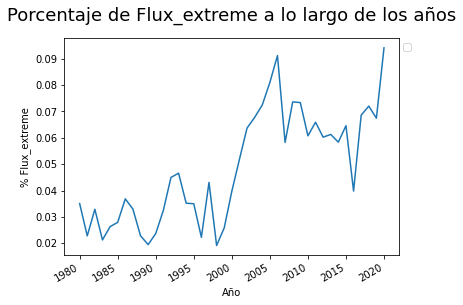

In [27]:
plt.plot(df2['year'],df2['%extreme']) #Gráficamos eventos extremos flux en función del tiempo
plt.xlabel("Año") #Escribimos el nombre del eje x
plt.ylabel("% Flux_extreme") #Escribimos el nombre del eje y
plt.xticks(rotation=30, ha='right') #Ajustes de diseño
plt.legend(bbox_to_anchor=(1.05, 1)) #Ajustes de diseño
plt.title("Porcentaje de Flux_extreme a lo largo de los años", y=1.05, fontsize=18) #Titulo del gráfico
plt.show()  

Vemos que efectivamente han presentado una tendencia al alza en los últimos años, especialmente posterior al año 2000 donde presentó una alza considerable para luego estabilizarse levemente. 
Notemos tambien que esa "baja" que habíamos notado en el gráfico anterior durante el 2020 efectivamente estaba erronea y se había ensuciado debido a la cantidad de datos que eliminamos inicialmente. Por esta razón era importante analizar los datos de forma porcentual.

## Predicción de Extreme Flux
A continuación, entrenaremos algunos modelos que nos permitan estimar la probabilidad de que ocurra un extreme flux.
Comenzaremos estableciendo cómo se utilizará el modelo y en base a esto qué variables utilizaremos o necesitaremos crear (teniendo en cuenta la temporalidad). 

El modelo podría usarse para predecir si al día siguiente ocurrirá un 'extreme flux'. Esto podría ser muy útil para tanto entidades gubernamentales como organizaciones sociales, donde podrían actuar, prepararse y prevenir posibles catástrofes que podrían ocurrir por el evento meteorológico. De esa forma, permitiría ejercer un plan de acción para prepararse antes de que el evento ocurra.


Bajo esta misma línea, no tiene sentido predecir lo que ocurrirá hoy debido a que deja poco espacio de acción y el sentido del modelo de prevenir catástrofes se perdería. 


En base a esto, supongamos que el uso del modelo será que cada día se entrene con variables disponibles en ese entonces: es decir, no podremos entrenar con la data del mismo día ya que aún no la tendremos, ni menos aún data del futuro. 


Target: Dada la data disponible hasta el día previo a la predicción, ¿Ocurrirá un evento extremo al día siguiente?


Lag: Como se puede notar existirá un lag de 2 días entre la data que se usa y el día que se busca predecir.


Variables que se utilizarán: 
- Precipitación t-2 días
- Temperatura máxima t-2 días
- Flex t-2 días
- Flux_extreme t-2 días
- Temp_extreme t-2 días
- Precip_extreme t-2 días
- Variación Flex t-4 y t-2 : se creará esta variable con el fin de capturar la tendencia de flex en los días previos, si se nota una alza podría indicar una posible alza nuevamente a futuro.
- Porcentaje y cantidad de eventos extremos que ocurrieron el año previo en esa estación: Incluir las estaciones donde ocurren mayor % de eventos extremos podría ayudarnos a predecir un posible nuevo evento extremo.
- Días transcurridos desde el último evento extremo en ese lugar: capturaría la probabilidad de que vuelva a ocurrir un evento dado que ya ocurío uno hace cierta cantidad de días
- Estación del año
- Cuántos eventos extremos ocurrieron el mes previo: Nos ayuda capturando información previa
- Cuántos eventos extremos ocurrieron el mismo mes hace un año: nos ayuda a capturar la temporalidad del año
- Mes 
- Mean elevación del lugar
- Area kilometros cuadrados

In [28]:
# Generamos el tablon final con todas las variables que utilizaremos para entrenar: df_modelo

# 1) Agregamos precip, temp, flux, flux_extreme, temp_extreme, precip_extreme 2 días antes.
df["dia-2"]= df["date"]- dt.timedelta(days=2)  #Establecemos qué fecha era 2 días antes
dic = df[["basin_id","precip","flux","temp_max","date","temp_extreme","flux_extreme","precip_extreme"]]
dic.columns=["basin_id","precip_2","flux_2","temp_max_2","date2","temp_extreme_2","flux_extreme_2","precip_extreme_2"] # Hacemos diccionario que contenga basin_id, precip, flux, temp_max y dia-2 
df = pd.merge(df, dic,  how='left', left_on=['basin_id','dia-2'], right_on = ['basin_id','date2'])
df.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,...,temp_extreme,precip_extreme,dia-2,precip_2,flux_2,temp_max_2,date2,temp_extreme_2,flux_extreme_2,precip_extreme_2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,0.0,1979-12-30,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,0.0,1979-12-31,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,0.0,1980-01-01,0.0,0.579,10.685653,1980-01-01,0.0,0.0,0.0
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,0.0,1980-01-02,0.0,0.543,11.470960,1980-01-02,0.0,0.0,0.0
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.0,0.0,1980-01-03,0.0,0.482,11.947457,1980-01-03,0.0,0.0,0.0


In [29]:
# 2) Agregamos variación flux t-4 y t-2
df["dia-4"]= df["date"]- dt.timedelta(days=4)  #Establecemos qué fecha era 4 días antes
dic = df[["basin_id","flux", "date"]]
dic.columns=["basin_id","flux_4","date4"] # Hacemos diccionario
df = pd.merge(df, dic,  how='left', left_on=['basin_id','dia-4'], right_on = ['basin_id','date4'])
df["var_flux_2_4"]=df["flux_2"]-df["flux_4"]
df.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,...,flux_2,temp_max_2,date2,temp_extreme_2,flux_extreme_2,precip_extreme_2,dia-4,flux_4,date4,var_flux_2_4
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,NaN,NaN,NaT,NaN,NaN,NaN,1979-12-28,NaN,NaT,NaN
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,NaN,NaN,NaT,NaN,NaN,NaN,1979-12-29,NaN,NaT,NaN
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.579,10.685653,1980-01-01,0.0,0.0,0.0,1979-12-30,NaN,NaT,NaN
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.543,11.470960,1980-01-02,0.0,0.0,0.0,1979-12-31,NaN,NaT,NaN
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,...,0.482,11.947457,1980-01-03,0.0,0.0,0.0,1980-01-01,0.579,1980-01-01,-0.097


In [30]:
#Cantidad de eventos extremos que ocurrieron el año previo en esa estación: 
dic = df.groupby(["year","estacion"], as_index=False)["flux_extreme"].sum() #Hacemos un diccionario que contenga por año y estacion la cantidad de flux extremos ocurrieron
dic.columns=['year1','estacion','sum_extreme_year_1'] #renombramos columnas
df["year-1"]= df["year"]- 1  #Establecemos qué fecha era 1 año antes
df = pd.merge(df, dic,  how='left', left_on=['year-1','estacion'], right_on = ['year1','estacion'])
df["sum_extreme_year_1"].describe()

count    4.104023e+06
mean     1.373695e+03
std      7.447830e+02
min      1.120000e+02
25%      7.090000e+02
50%      1.305000e+03
75%      2.039000e+03
max      2.920000e+03
Name: sum_extreme_year_1, dtype: float64

In [31]:
#Cantidad de eventos extremos que ocurrieron el mes previo en esa estacion meteorologica: 
dic = df.groupby(["month","year", "basin_id"], as_index=False)["flux_extreme"].sum() #Hacemos un diccionario que contenga por mes y año la q de flux extreme
dic.columns=['month1','year','basin_id','sum_extreme_month_1'] #renombramos columnas
df["month-1"]= df["month"]- 1  #Establecemos qué fecha era 1 mes antes
df.loc[df["month-1"]==0,"month-1"]=12
df["month-1"].describe()
df = pd.merge(df, dic,  how='left', left_on=['month-1','year','basin_id'], right_on = ['month1','year','basin_id'])
df["sum_extreme_month_1"].describe()

count    4.087996e+06
mean     1.492198e+00
std      5.928078e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.100000e+01
Name: sum_extreme_month_1, dtype: float64

Por temas de tiempo, no se alcanzó a implementar todas las variables propuestas. También existe la opción de agregar variables externas que podrían estar correlacionadas con la ocurrencia de este tipo de efectos climatológicos. Por ejemplo, la contaminación si se relaciona activamente con las temperaturas que tenemos, por ende se podría agregar información ambiental sobre la contaminación. 


Construiremos entonces el tablón final con las variables que utilizaremos para modelar

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175037 entries, 0 to 4175036
Data columns (total 34 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   basin_id             int64         
 2   flux                 float64       
 3   precip               float64       
 4   temp_max             float64       
 5   gauge_name           object        
 6   lat                  float64       
 7   lon                  float64       
 8   mean_elev            float64       
 9   area_km2             float64       
 10  year                 int64         
 11  month                int64         
 12  estacion             object        
 13  flux_extreme         float64       
 14  temp_extreme         float64       
 15  precip_extreme       float64       
 16  dia-2                datetime64[ns]
 17  precip_2             float64       
 18  flux_2               float64       
 19  temp_max_2           

In [33]:
#Tablon final donde seleccionamos solo las variables que utilizaremos
df_modelo = df[["lat", "lon","mean_elev","area_km2","year", "month", 
                "flux_extreme", "precip_2","flux_2","temp_max_2","temp_extreme_2",
                "flux_extreme_2", "precip_extreme_2","var_flux_2_4","sum_extreme_year_1", "sum_extreme_month_1"]]
df_modelo.head()

,lat,lon,mean_elev,area_km2,year,month,flux_extreme,precip_2,flux_2,temp_max_2,temp_extreme_2,flux_extreme_2,precip_extreme_2,var_flux_2_4,sum_extreme_year_1,sum_extreme_month_1
0,-18.0769,-69.1961,4842.449328,49.711859,1980,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,-18.0769,-69.1961,4842.449328,49.711859,1980,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,-18.0769,-69.1961,4842.449328,49.711859,1980,1,0.0,0.0,0.579,10.685653,0.0,0.0,0.0,NaN,NaN,0.0
3,-18.0769,-69.1961,4842.449328,49.711859,1980,1,0.0,0.0,0.543,11.470960,0.0,0.0,0.0,NaN,NaN,0.0
4,-18.0769,-69.1961,4842.449328,49.711859,1980,1,0.0,0.0,0.482,11.947457,0.0,0.0,0.0,-0.097,NaN,0.0


In [34]:
df_modelo["flux_extreme"].value_counts(normalize=True)  #se analiza como se comporta la variable a predecir

0.0    0.949955
1.0    0.050045
Name: flux_extreme, dtype: float64

Es importante hacer incapié en que nos encontramos ante un problema desbalanceado de clases, ya que la clase a predecir es bastante más pequeña que la clase no-evento (cerca de un 5% de la base porque recordemos que nosotros creamos esa variable de esa forma). Luego, podríamos facilmente caer en un problema de clases desbalanceadas donde el modelo tienda a predecir muchas de las observaciones como no-evento buscando disminuir su error de predicción. Lo ideal sería probar con algoritmos de balancea (puede ser undersampling u oversampling), pero que por temas de tiempo no alcancé a impementar.

In [35]:
df_modelo.isnull().sum()

lat                        0
lon                        0
mean_elev                  0
area_km2                   0
year                       0
month                      0
flux_extreme               0
precip_2               25650
flux_2                 25650
temp_max_2             25650
temp_extreme_2         25650
flux_extreme_2         25650
precip_extreme_2       25650
var_flux_2_4           49973
sum_extreme_year_1     71014
sum_extreme_month_1    87041
dtype: int64

Dado que al aplicar lags quedaron ciertos datos nulos y para evitar complicaciones al entrenar el modelo, se procede a eliminar estas observaciones entendiendo que se pierde solo un 2% de la data, correspondiente al primer año de historia que se tiene registro.

In [36]:
df_modelo = df_modelo.dropna() 

Procedemos a dividir la data en entrenamiento y testeo (tomaremos una división 80/20)

In [37]:
# Separamos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(df_modelo, df_modelo["flux_extreme"], test_size=0.2, random_state=123)

In [38]:
X_train = X_train[["lat", "lon","mean_elev","area_km2","year", "month","precip_2","flux_2","temp_max_2","temp_extreme_2",
                "flux_extreme_2", "precip_extreme_2","var_flux_2_4","sum_extreme_year_1", "sum_extreme_month_1"]]
X_test = X_test[["lat", "lon","mean_elev","area_km2","year", "month","precip_2","flux_2","temp_max_2","temp_extreme_2",
                "flux_extreme_2", "precip_extreme_2","var_flux_2_4","sum_extreme_year_1", "sum_extreme_month_1"]]

Dado que siempre vamos a predecir a futuro siempre, podría ser conveniente evaluar el desempeño del modelo en una base de testeo unicamente del último año por ejemplo y entrenar con el resto de la historia. Por tiempo no lo realizaremos pero sería buena idea de implementar

Comenzaremos entonces entrenando desde un modelo sencillo e iremos aumentando la dificultad del modelo. Siempre es importante probar ambos espectros porque se debe considerar el trade-off entre simplicidad y desempeño al momento de entrenar. 

In [40]:
# Entrenamos con logística
logit = LogisticRegression(random_state=123)
logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=123)

In [41]:
# Entrenamos con Random Forest
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
# Entrenamos con XGBoost
xg = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg.fit(X_train,y_train)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
             objective='reg:logistic')

## Analizamos los resultados del modelo
a) A continuación evaluaremos las métricas de desempeño de cada modelo que entrenamos, así como las variables que resultaron más importantes al momento de entrenarlo.


Para este problema específico, no nos interesa tanto las métricas globales, ya que lo que más nos importa es que si es un evento extremo podamos predecirlo con tiempo y así evitar desastres o, incluso, salvar vidas. 


Otro aspecto a considerar es la confiabilidad que generamos en nuestros clientes/contrapartes. En un tema como esté, cada alarma que generemos requerirá uso de recursos y tiempo de parte de ellos, por lo que si levantamos muchas alarmas falsas se dejará de tener confiabilidad en el modelo y nuestro trabajo no tendrá sentido. Queremos que las alarmas que levantemos realmente terminen en un evento extremo, buscando identificar dentro de este rango a la mayor cantidad de eventos posibles.


Es por esta razón que pondremos especial enfasis en el LIFT del modelo, ¿qué tan propensos son los grupos con mayor probabilidad respecto a los de menor probabilidad? Buscamos que este número sea lo más alto posible.



La métrica de mayor utilidad en este caso es el lift porque probablemente si deseamos levantar alertas, no podremos hacerlo cada vez que haya una mínima posibilidad o perderemos credibilidad, así como tambien posibles recursos que el estado nos entregue para actuar. Luego, buscamos que entre un cierto % de casos más propensos estemos capturando la tasa más alta de eventos extremos.


También analizaremos los resultados de la curva ROC que nos permite ver una métrica más global de cómo se comporta el modelo.

In [43]:
# Performace Logistica
predictions = logit.predict_proba(X_test)[:,1]
predictions

array([0.00087968, 0.00125681, 0.00223847, ..., 0.00130651, 0.00096331,
       0.00164981])

In [44]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.106289


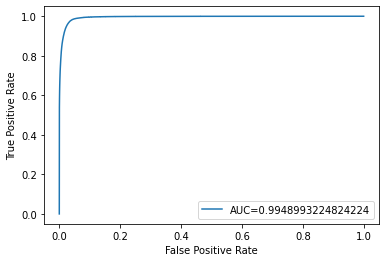

In [45]:
y_pred_proba = logit.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Se observa que el resultado del modelo es bastante bueno al evaluar su desempeño en la curva ROC, llegando a ser casi un valor perfecto. Puede que exista algo extraño en la data por el alto valor que alcanza en AUC, habría que revisar que las variables estén bien definidas y que no exista un problema de implementación

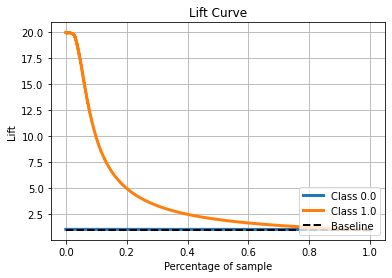

In [52]:
# Plot the lift curve
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=logit.predict_proba(X_test))

Al analizar la curva lift observamos que los resultados al momento de localizar los eventos extremos son bastante buenos. 

Por ejemplo, el grupo 10% más propenso a ser seleccionado como un evento extremo de flujo es casi 9 veces más propenso a terminar siendo uno respecto a los otros días.

Si generamos alarmas solo con los días que están en el 5% más propenso a ser un día extremo, la probabilidad de ser uno sería casi 16 veces más probable que el común de los días.

En otras palabras, dado que la probabilidad global de ser un día de flujo extremo es de un 5%, en ese segmento en le que generaremos alarmas, la probabilida subirá a un 80%!. 

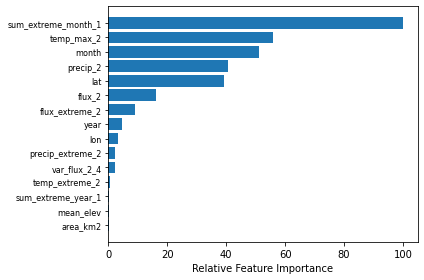

In [47]:
feature_importance = abs(logit.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Si observamos las variables más importantes del modelo se observa que la cantidad de flujos extremos que ocurrieron el mes previo es aquella variable que más valor le entrega a nuestro modelo logit.

Por otro lado, variables como el área, la elevación o la cantidad de eventos que ocurrieron el año previo no son utilizadas por el modelo, por lo que no serían una gran herramienta para predecir nuestra variable objetivo

In [48]:
# Performance Random Forest 
predictions = model.predict(X_test)
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.083844


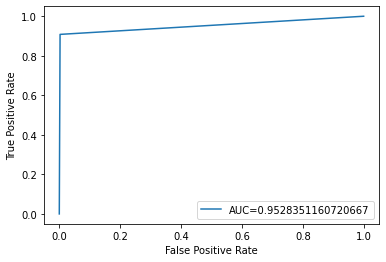

In [50]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Nuevamente, nuestro modelo tiene buena performance a modo global.

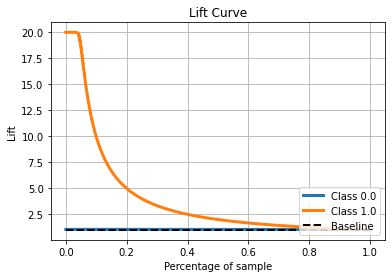

In [53]:
# Plot the lift curve
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=model.predict_proba(X_test))

En cuanto a la métrica de LIFT, observamos que el 10% más propenso a ser un día de flujo extremo es aproximadamente 8 veces más propenso que el grupo total.

Si levantamos alarmas solo en el 5% más propenso de los casos, este grupo sería 16 veces más propenso a ser un día de flujo extremo. 

Luego, en comparación con el modelo anterior se obtienen resultados muy similares pero en random forest se observa que los primeros percentiles tienen un desempeño mejor para predecir. Esto se observa ya que la curva lift de logit baja inmediatamente, mientrás que en RF se mantiene arriba por algunas observaciones antes de comenzar a descender

Feature: 0, Score: 0.01971
Feature: 1, Score: 0.01736
Feature: 2, Score: 0.01981
Feature: 3, Score: 0.05374
Feature: 4, Score: 0.01189
Feature: 5, Score: 0.02273
Feature: 6, Score: 0.02471
Feature: 7, Score: 0.26855
Feature: 8, Score: 0.02313
Feature: 9, Score: 0.00037
Feature: 10, Score: 0.33119
Feature: 11, Score: 0.00377
Feature: 12, Score: 0.04222
Feature: 13, Score: 0.01280
Feature: 14, Score: 0.14802


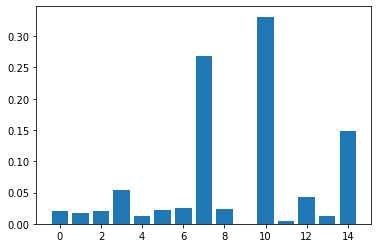

,0
flux_extreme_2,0.331186
flux_2,0.268552
sum_extreme_month_1,0.148025
area_km2,0.053741
var_flux_2_4,0.042219
precip_2,0.024710
temp_max_2,0.023131
month,0.022733
mean_elev,0.019809
lat,0.019705


In [54]:
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

pd.DataFrame(model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

Como se puede ver en este modelo las variables más importantes para el modelo al momento de predecir es si ocurrió un evento de flujo extremo 2 días antes, es decir, esta variable nos ayuda a predecir atamente la probabilidad de que vuelva a ocurrir un evento. También la variable de flujo que se tuvo 2 días antes resulta ser muy importante. 

En base a esto, podemos concluir que la historia del flujo permite predecir a futuro cómo este mismo se desarrollará: el flujo entre días está altamante correlacionado y  podría ayudarnos a predecir a futuro!

En este caso, las variables que menos utiliza el modelo para entrenar son precipitaciones extremas y temperaturas extremos que ocurriero dos dias antes.

In [55]:
# Performance XGBoost
predictions = xg.predict(X_test)
predictions

array([0.17942227, 0.1939247 , 0.18630818, ..., 0.17979394, 0.17908464,
       0.18576181], dtype=float32)

In [56]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.211429


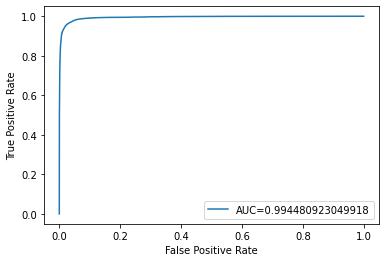

In [58]:
y_pred_proba = xg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

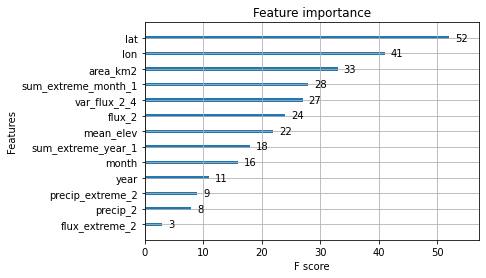

In [59]:
xgb.plot_importance(xg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

En este caso la variable más importante fue la ltitud y longitud, es decir, este modelo utilizó variables de locación para estimar la probabilidad de que un evento sea extremo.

En base a los resultados se puede decir que el modelo que obtuvo mejor desempeño fue Random Forest, pero que un modelo logit de todas maneras alcanza un buen comportamiento y sería más simple su implementación en caso de recurrirlo.

Un aspecto importante que se debe analizar en otra ocasión es si los modelos presentan un sobreajuste muy alto, lo que podría finalizar en modelos que a futuro presentan cada vez peor desempeño. 

Algunas mejoras a los modelos pueden ser:

1) Probar con otros parámetros al momento de entrenar y ver cómo varía la performance. Por ejemplo, hacer cross-validation (especialmente util para overffiting)

2) También se podrían probar otros modelos que historicamente han presentado buen desempeño, por ejemplo: stacked ensemble, redes neuronales, gbm, etx

b) Por último, podemos preguntarnos qué métrica analizar si queremos identificar al menos el 70% de los eventos de flujo extremo.

Para responder a esta pregunta debemos observar la metrica de Recall, donde se obtiene el porcentaje de eventos que predijimos que serían extremos sobre el total de eventos extremos que hubieron. 

En nuestro caso, para Random Forest el Recall fue de:

In [60]:
metrics.recall_score(y_test, model.predict(X_test))

0.908237773818784

Por ende, con el modelo Random Forest alcanzamos un recall de un 91%, es decir, logramos identitificar el 91% de los casos que son eventos de flujo extremo!! Esta tasa de eror es bastante baja por lo que podríamos evitar muchas catástrofes a futuro y estar mejor preparados ante estas problemáticas meteorológicas.